<a href="https://colab.research.google.com/github/manojnahak02/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Network/blob/master/Stock_Price_Prediction_using_Keras_and_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Recurrent Neural Network is used to predict the opening price of Google stock

#Part 1- Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# from google.colab import files
# upload = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
# import io

In [0]:
# dataset_train = pd.read_csv(io.BytesIO(upload['Google_Stock_Price_Train.csv']))

In [0]:
file=r'/content/drive/My Drive/Colab Notebooks/Stock Price Prediction/Google_Stock_Price_Train.csv'
dataset_train=pd.read_csv(file)

In [0]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,01-03-12,325.25,332.83,324.97,663.59,7380500
1,01-04-12,331.27,333.87,329.08,666.45,5749400
2,01-05-12,329.83,330.75,326.89,657.21,6590300


In [0]:
training_set = dataset_train.iloc[:, 1:2].values  #iloc = integer location, storing only the open column in training_set

In [0]:
#Feature scaling - to scaledown the values into same range btwn 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
#creating a dataset with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i, 0]) #i-60 means (0th index value) :to i which is 60(i.e. 59th index value)
  y_train.append(training_set_scaled[i, 0])
x_train,y_train = np.array(x_train), np.array(y_train) #converting list into arrays

In [0]:
x_train.shape

(1198, 60)

In [0]:
#Reshaping
#syntax - 3D tensor with shape (batch_size, timesteps, input_dim).
#batch_size= total rows, timesteps=total features, input_dim=1

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [0]:
#Part 2 - Building the RNN

#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense #for creating neurons
from keras.layers import LSTM  #long short term memory
from keras.layers import Dropout #helps in eleminating those neurons who predicted values = 0

Using TensorFlow backend.


In [0]:
#initializing the RNN
regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #dropout ration is 20%




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a Fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [0]:
#adding a output layer
regressor.add(Dense(units=1))#this will actually give us the prediction of the next day. (i.e the 61st day)

In [0]:
#Compiling the RNN using adam optimizer which helps in getting the global minimum points quickly.
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Fitting the RNN to the training set (takes 20 - 30 mins to run)
#regressor.fit(x_train,y_train, epochs=100, batch_size=32) #epochs 100 times it will run , input batch size = 32
#Here loss will be decresing with each and every increase in epochs
regressor.fit(x_train,y_train, epochs=20, batch_size=32)

In [0]:
#Part 3- Making the prediction and visualizing the results

#Getting the real stock price of 2017
upload = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [0]:
dataset_test = pd.read_csv(io.BytesIO(upload['Google_Stock_Price_Test.csv']))

In [0]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
#Getting the real stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

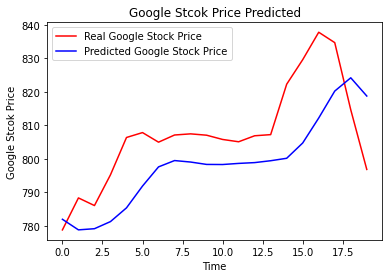

In [0]:
  #visualising the results
  plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
  plt.plot(predicted_stock_price, color = 'blue', label='Predicted Google Stock Price')
  plt.title('Google Stcok Price Predicted')
  plt.xlabel('Time')
  plt.ylabel('Google Stcok Price')
  plt.legend()
  plt.show()